In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$80K - $137K (Glassdoor est.),Job Description\r\n\r\nWhat You’ll Get to Do:\...,3.9,CACI\r\n3.9,"McLean, VA",-1,10000+ Employees,1962,Company - Public,...,137,108.5,CACI\r\n,VA,59,1,0,0,1,0
1,Principal Data Scientist,$104K - $170K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO\r\n3.5,"Chevy Chase, MD",-1,10000+ Employees,1936,Subsidiary or Business Segment,...,170,137.0,GEICO\r\n,MD,85,0,0,0,0,0
2,Data Engineer,$60K - $109K (Glassdoor est.),Job Summary\r\nThis role is responsible for th...,2.8,Atlantic Broadband\r\n2.8,"Quincy, MA",-1,501 to 1000 Employees,-1,Company - Public,...,109,84.5,Atlantic Broadband\r\n,MA,-1,0,0,0,0,0
3,"Scientist III, Quality Control",$35K - $64K (Glassdoor est.),The Scientist 3 - QC is responsible to perform...,3.4,Amneal Pharmaceuticals\r\n3.4,"Brookhaven, NY",-1,5001 to 10000 Employees,2002,Company - Public,...,64,49.5,Amneal Pharmaceuticals\r\n,NY,19,0,0,0,0,0
4,Healthcare Analytics Consultant,$48K - $74K (Glassdoor est.),"The Berkeley Research Group, LLC (BRG) Healthc...",3.1,"Berkeley Research Group, LLC\r\n3.1","Tampa, FL",-1,1001 to 5000 Employees,2010,Company - Private,...,74,61.0,"Berkeley Research Group, LLC\r\n",FL,11,0,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manger'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'



In [6]:
## job title and seniority
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    21
analyst           12
na                11
manger             2
data engineer      1
Name: job_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        39
senior     8
Name: seniority, dtype: int64

In [8]:
df.job_state.value_counts()

 MD    6
 IL    4
 MO    4
 MA    4
 TX    4
 FL    3
 NC    3
 CA    3
 WI    2
 NY    2
 AL    2
 VA    2
 AZ    1
 KY    1
 OH    1
 MI    1
 WA    1
 SC    1
 PA    1
 IN    1
Name: job_state, dtype: int64

In [9]:
## Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     3240
1      974
2      629
3      968
4     1577
5     2077
6      559
7      501
8      886
9      553
10    1094
11    1165
12    1239
13     681
14     951
15    1008
16     947
17     459
18    1931
19    1643
20    1138
21     865
22     679
23     645
24    3294
25    1341
26    1214
27    1036
28     116
29     764
30    1316
31     763
32    1658
33     892
34    1357
35    3073
36    1217
37     947
38    2659
39    2560
40     691
41     713
42     584
43    1099
44    3166
45     902
46    3697
Name: desc_len, dtype: int64

In [10]:
## hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

In [11]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary


In [12]:
## remove new line from job title
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [13]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,desc_len
count,47.000000,47.0,47.000000,47.0,47.0,47.000000,47.000000,47.000000,47.000000,47.000000,47.0,47.000000,47.000000,47.0,47.000000
mean,3.631915,-1.0,1807.404255,-1.0,0.0,64.425532,111.127660,87.776596,41.425532,0.021277,0.0,0.021277,0.063830,0.0,1307.829787
std,0.545378,0.0,558.573325,0.0,0.0,24.948420,36.465956,30.203622,36.680610,0.145865,0.0,0.145865,0.247092,0.0,856.581865
min,2.100000,-1.0,-1.000000,-1.0,0.0,11.000000,55.000000,42.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.0,116.000000
25%,3.350000,-1.0,1942.000000,-1.0,0.0,40.000000,79.000000,60.750000,14.500000,0.000000,0.0,0.000000,0.000000,0.0,738.000000
50%,3.600000,-1.0,1980.000000,-1.0,0.0,65.000000,108.000000,84.500000,28.000000,0.000000,0.0,0.000000,0.000000,0.0,1008.000000
75%,4.000000,-1.0,2002.000000,-1.0,0.0,83.500000,137.000000,110.000000,57.500000,0.000000,0.0,0.000000,0.000000,0.0,1467.000000
max,4.700000,-1.0,2015.000000,-1.0,0.0,113.000000,207.000000,160.000000,147.000000,1.000000,0.0,1.000000,1.000000,0.0,3697.000000


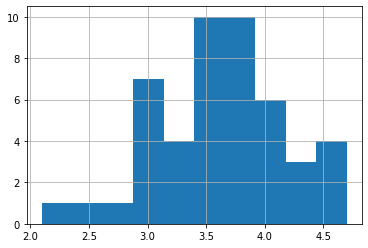

In [14]:
df.Rating.hist()

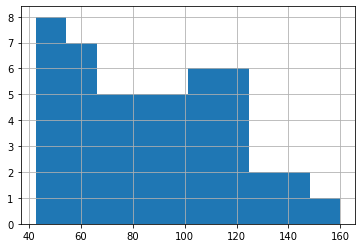

In [15]:
df.avg_salary.hist()

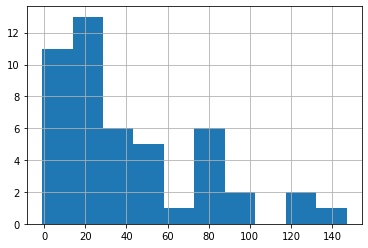

In [16]:
df.age.hist()

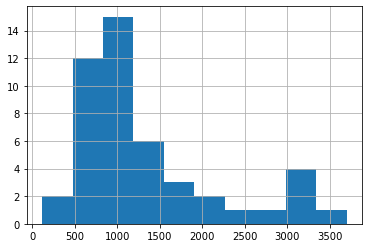

In [17]:
df.desc_len.hist()

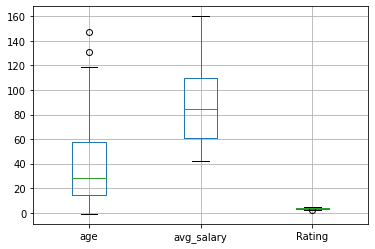

In [18]:
df.boxplot(['age','avg_salary','Rating'])

In [19]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.004925,0.378998,-0.198188
avg_salary,0.004925,1.000000,0.082595,0.028623
Rating,0.378998,0.082595,1.000000,-0.187462
desc_len,-0.198188,0.028623,-0.187462,1.000000


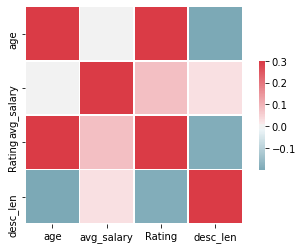

In [20]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap, 
           square=True, linewidths=.5, cbar_kws={'shrink':.5})

In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [22]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector',
    'Revenue','company_txt','job_state','spark', 'aws', 'excel','job_simp', 'seniority',]]

graph for %s: total = %d % (i, len(cat_num))


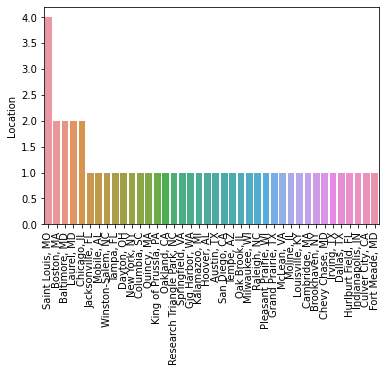

graph for %s: total = %d % (i, len(cat_num))


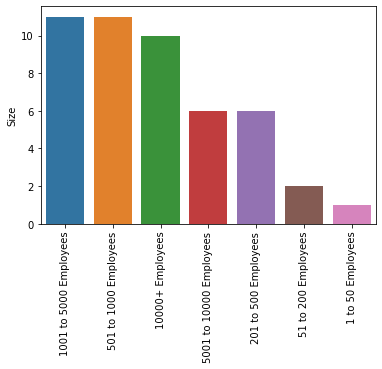

graph for %s: total = %d % (i, len(cat_num))


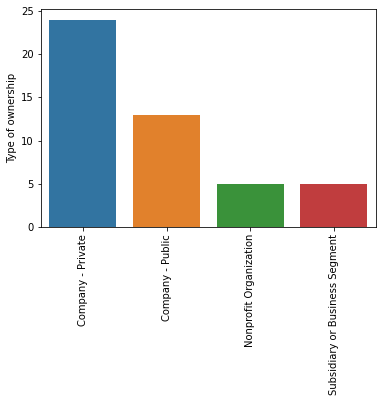

graph for %s: total = %d % (i, len(cat_num))


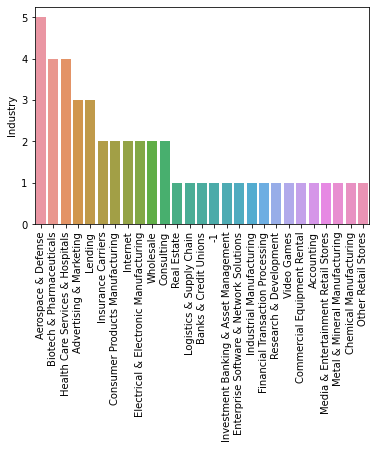

graph for %s: total = %d % (i, len(cat_num))


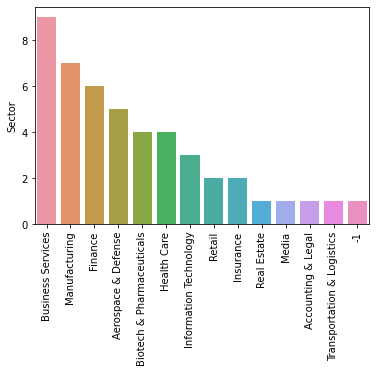

graph for %s: total = %d % (i, len(cat_num))


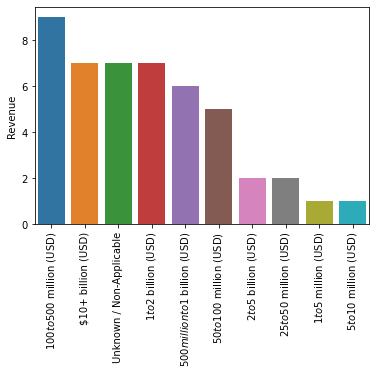

graph for %s: total = %d % (i, len(cat_num))


C:\Users\shobhit deshwal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shobhit deshwal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


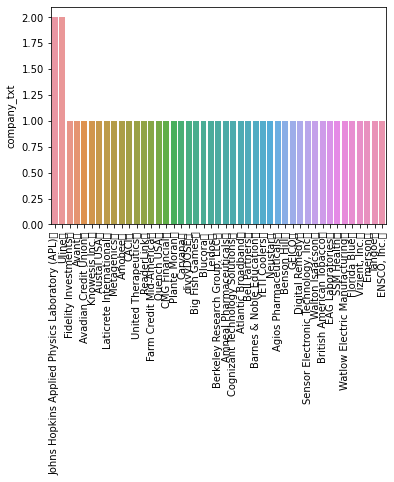

graph for %s: total = %d % (i, len(cat_num))


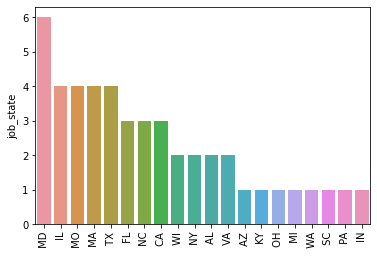

graph for %s: total = %d % (i, len(cat_num))


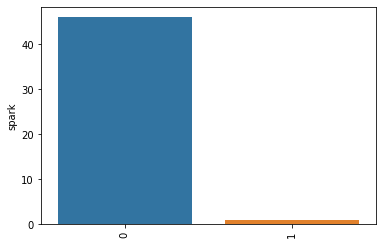

graph for %s: total = %d % (i, len(cat_num))


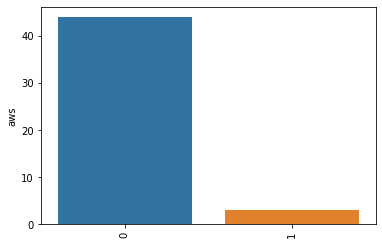

graph for %s: total = %d % (i, len(cat_num))


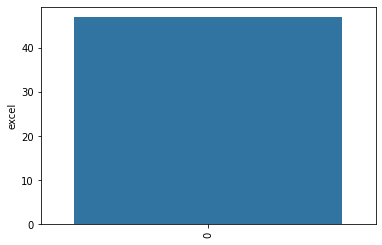

graph for %s: total = %d % (i, len(cat_num))


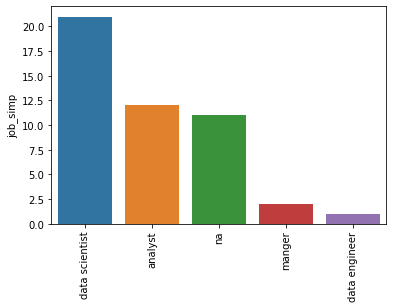

graph for %s: total = %d % (i, len(cat_num))


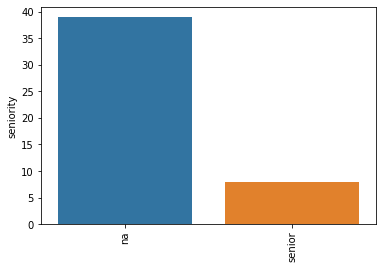

In [23]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d % (i, len(cat_num))")
    chart = sns.barplot(x=cat_num.index ,y= cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()    

In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [25]:
pd.pivot_table(df,index= 'job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,59.291667
data engineer,84.500000
data scientist,110.023810
manger,87.250000
na,76.772727


In [26]:
pd.pivot_table(df,index= ['job_simp','seniority'],values='avg_salary')

avg_salary
job_simp       seniority            
analyst        na          59.291667
data engineer  na          84.500000
data scientist na         106.250000
               senior     117.571429
manger         na          87.250000
na             na          68.450000
               senior     160.000000

In [27]:
pd.pivot_table(df,index='job_state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
CA,127.666667
AZ,116.000000
KY,114.500000
MD,106.750000
MO,104.125000
MA,98.125000
IL,93.250000
TX,89.125000
FL,86.000000


In [28]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to C:\Users\shobhit
[nltk_data]     deshwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


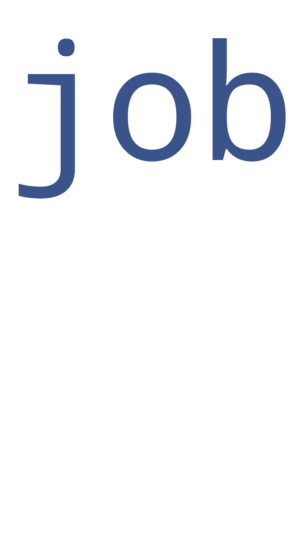

In [29]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """ remove puctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
        return filtered
    
words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color = "white", random_state=1, stopwords= STOPWORDS, max_words= 2000, width = 800, height= 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()
    

In [30]:
pd.to_csv('eda_data.csv')

AttributeError: module 'pandas' has no attribute 'to_csv'